In [39]:
# Importing necessary libraries

# For data manipulation and analysis
import pandas as pd
# For numerical operations
import numpy as np

# For statistical data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For Preprocessing
from sklearn.preprocessing import StandardScaler # For standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import LabelEncoder   # For encoding categorical labels into numerical format


# For Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

# For Stochastic Gradient Descent classifier
from sklearn.linear_model import SGDClassifier
# For Support Vector Classifier
from sklearn.svm import SVC
# For Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold # For splitting data and cross-validation
from sklearn.model_selection import GridSearchCV # For hyperparameter tuning using grid search
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc # For classification evaluation metrics and plotting
from sklearn.preprocessing import label_binarize # For binarizing labels for multi-class ROC
from sklearn.metrics import roc_auc_score # For calculating ROC AUC score
from sklearn.metrics import precision_score, recall_score, f1_score # For precision, recall, and F1-score
from sklearn.utils.class_weight import compute_class_weight # For computing class weights
from sklearn.metrics import log_loss,accuracy_score # For calculating log loss,accuracy

# To manage warnings
import warnings

In [40]:
#  Loading Dataset
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
print(df)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [41]:

# Preprocessing steps:

# Find missing values
print("Dataset Info:")
print(df.info())
print("\nMissing values in each column:")
df['Sleep Disorder'].fillna('No Sleeping Disorders', inplace=True)
print(df.isnull().sum())

# Remove duplicates and prepare for analysis
df.drop_duplicates(inplace=True)

# Split 'Blood Pressure' into 'Systolic' and 'Diastolic'
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
df['Diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
df.drop(columns=['Blood Pressure'], inplace=True)

# Encoding categorical columns
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#  Features and target
target = 'Stress Level'
X = df.drop(columns=[target])
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None

Mi

/tmp/ipython-input-4228393335.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('No Sleeping Disorders', inplace=True)


EXPLORATORY DATA ANALYSIS

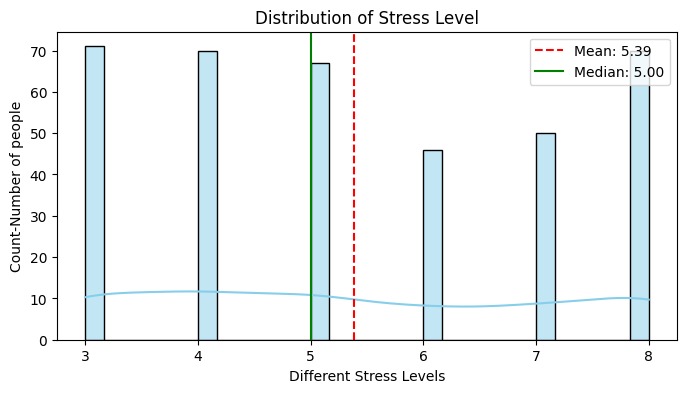

Stress Level Mean: 5.39
Stress Level Median: 5.00
Stress Level Standard Deviation: 1.77


In [42]:

# 1. Distribution of Stress Level

# Histogram of Target Variable with Mean and Median Lines
plt.figure(figsize=(8, 4))
sns.histplot(df[target], kde=True, bins=30, color='skyblue')
plt.title(f"Distribution of Stress Level")
plt.xlabel('Different Stress Levels')
plt.ylabel('Count-Number of people')
mean_val = df[target].mean()
median_val = df[target].median()
plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()
print(f"{target} Mean: {mean_val:.2f}")
print(f"{target} Median: {median_val:.2f}")
print(f"{target} Standard Deviation: {df[target].std():.2f}")


/tmp/ipython-input-2663433056.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender Label', y='Stress Level', data=df, palette='pastel')


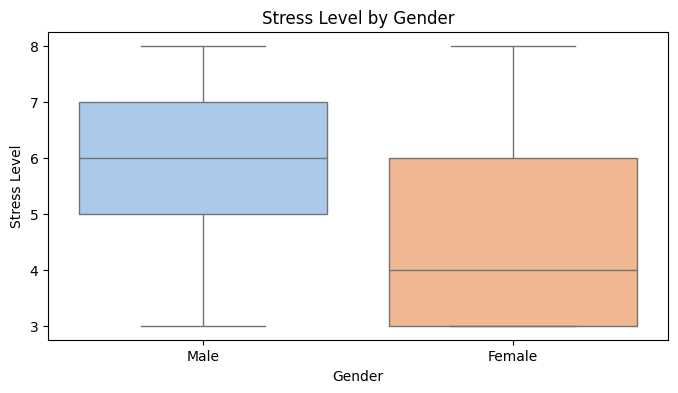

In [43]:
# 2. Gender vs Stress Level

# Decode back to original gender names for plotting
df['Gender Label'] = label_encoders['Gender'].inverse_transform(df['Gender'])

plt.figure(figsize=(8, 4))
sns.boxplot(x='Gender Label', y='Stress Level', data=df, palette='pastel')
plt.title('Stress Level by Gender')
plt.xlabel('Gender')
plt.show()
# Drop the temporary 'Gender Label' column
df.drop(columns=['Gender Label'], inplace=True)

/tmp/ipython-input-3810536488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Disorder Label', y='Sleep Duration', data=df, palette='Set2')


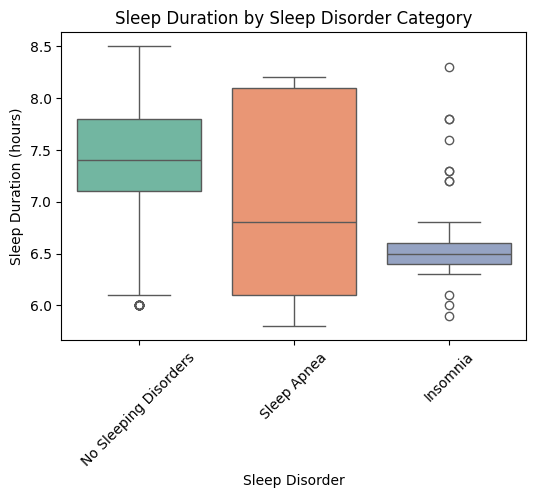

                       count      mean       std  min  25%  50%  75%  max
Sleep Disorder Label                                                     
Insomnia                77.0  6.589610  0.387157  5.9  6.4  6.5  6.6  8.3
No Sleeping Disorders  219.0  7.358447  0.732320  6.0  7.1  7.4  7.8  8.5
Sleep Apnea             78.0  7.032051  0.974812  5.8  6.1  6.8  8.1  8.2 



In [44]:
# 3. Sleep Duration across Sleep Disorder categories

# Decode back to original category names for plotting
df['Sleep Disorder Label'] = label_encoders['Sleep Disorder'].inverse_transform(df['Sleep Disorder'])
# Plot using the decoded labels
plt.figure(figsize=(6, 4))
sns.boxplot(x='Sleep Disorder Label', y='Sleep Duration', data=df, palette='Set2')
plt.title('Sleep Duration by Sleep Disorder Category')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()
# Grouped statistics by decoded labels
print(df.groupby('Sleep Disorder Label')['Sleep Duration'].describe(), "\n")


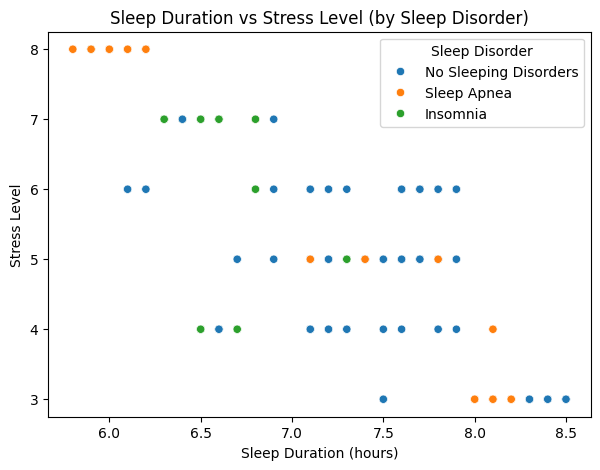

In [45]:
# 4. Scatter plot: Sleep Duration vs Stress Level
# Decode encoded labels back to original
df['Sleep Disorder Label'] = label_encoders['Sleep Disorder'].inverse_transform(df['Sleep Disorder'])
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Sleep Duration', y='Stress Level', hue='Sleep Disorder Label', data=df)
plt.title('Sleep Duration vs Stress Level (by Sleep Disorder)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.legend(title='Sleep Disorder')
plt.show()


/tmp/ipython-input-2204942722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sleep Disorder Label', palette='Set1')


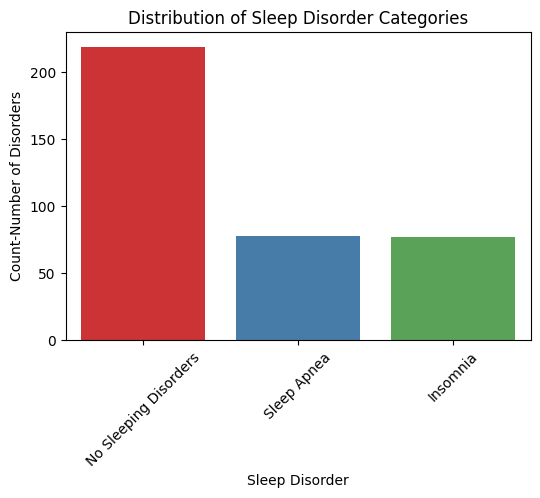

Sleep Disorder Label
No Sleeping Disorders    219
Sleep Apnea               78
Insomnia                  77
Name: count, dtype: int64


In [46]:
# 5. Count Plot: Sleep Disorder Distribution
# Decode back to original sleep disorder names
df['Sleep Disorder Label'] = label_encoders['Sleep Disorder'].inverse_transform(df['Sleep Disorder'])

# Plot using the decoded labels
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sleep Disorder Label', palette='Set1')
plt.title('Distribution of Sleep Disorder Categories')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count-Number of Disorders')
plt.xticks(rotation=45)
plt.show()

# Show counts of each sleep disorder category
counts = df['Sleep Disorder Label'].value_counts()
print(counts)


FEATURE SELECTION METHODS

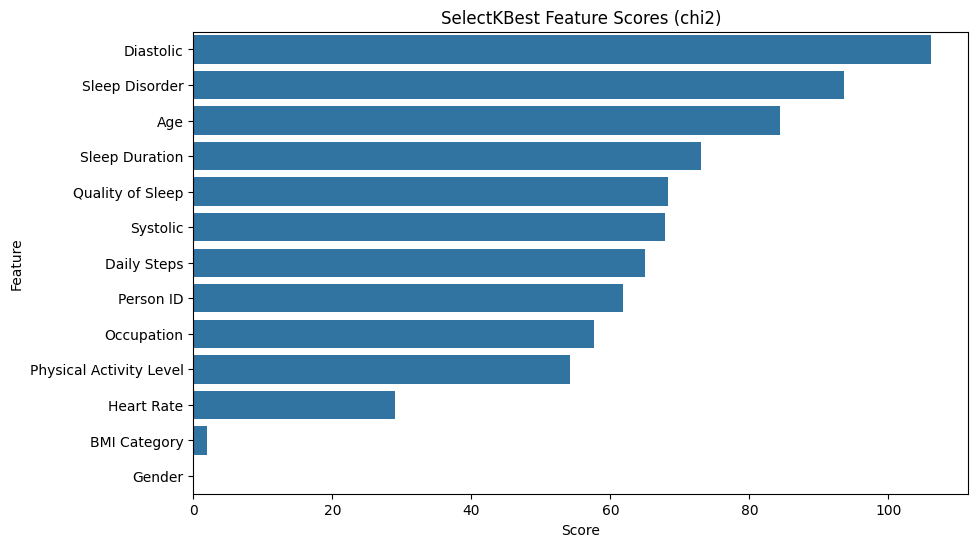


SelectKBest Feature Scores:
                    Feature       Score
12                Diastolic  106.186589
10           Sleep Disorder   93.616783
2                       Age   84.401550
4            Sleep Duration   72.973141
5          Quality of Sleep   68.283872
11                 Systolic   67.837643
9               Daily Steps   64.949159
0                 Person ID   61.891454
3                Occupation   57.700970
6   Physical Activity Level   54.265375
8                Heart Rate   28.985051
7              BMI Category    2.022354
1                    Gender    0.021090


In [47]:

# Feature 1. SelectKBest with chi2
kbest = SelectKBest(score_func=chi2, k='all')
kbest.fit(X_scaled.abs(), y)

feature_scores = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Score': kbest.scores_
}).sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title("SelectKBest Feature Scores (chi2)")
plt.show()

print("\nSelectKBest Feature Scores:")
print(feature_scores)



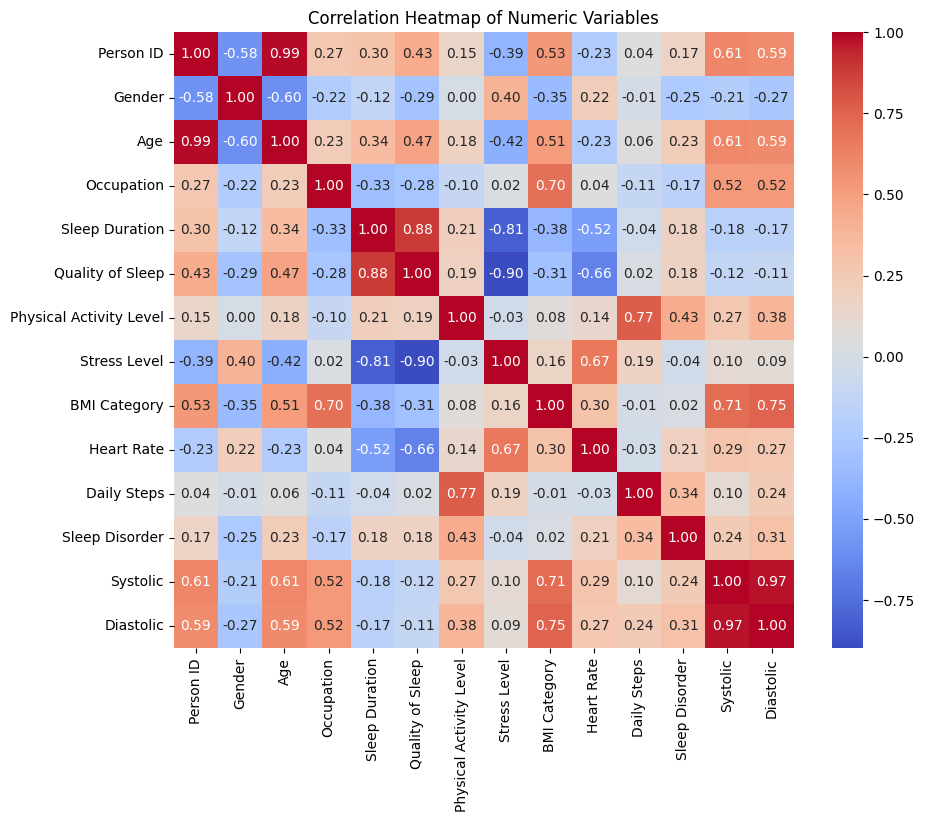

In [48]:
# Feature 2:Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()



MODEL 1: LOGISTIC REGRESSION

In [49]:
# Define Features and Split Data
features = ['Diastolic', 'Sleep Duration', 'Quality of Sleep', 'Heart Rate','Sleep Disorder', 'Age', 'Systolic']
target = 'Stress Level'
X = df[features]
y = df[target]
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_trainval_scaled = scaler.fit_transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

HYPERTUNING METHOD:GRIDSEARCH

In [50]:
# Grid Search for eta0


eta_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

best_eta = None
best_val_loss_eta = float("inf")
print("Grid Search for eta0")

for eta in eta_values:
    val_losses = []
    for train_idx, val_idx in skf.split(X_trainval_scaled, y_trainval):
        X_train_fold, X_val_fold = X_trainval_scaled[train_idx], X_trainval_scaled[val_idx]
        y_train_fold, y_val_fold = y_trainval.iloc[train_idx], y_trainval.iloc[val_idx]

        clf = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=eta,
                            max_iter=100, warm_start=True, random_state=40)

        clf.partial_fit(X_train_fold, y_train_fold, classes=np.unique(y))

        for epoch in range(100):
            clf.partial_fit(X_train_fold, y_train_fold)

        y_val_prob = clf.predict_proba(X_val_fold)
        val_loss = log_loss(y_val_fold, y_val_prob)
        val_losses.append(val_loss)

    avg_val_loss = np.mean(val_losses)
    print(f"eta0={eta} | Avg Val Loss: {avg_val_loss:.4f}")
    if avg_val_loss < best_val_loss_eta:
        best_val_loss_eta = avg_val_loss
        best_eta = eta

print(f"\nBest eta0: {best_eta} with Avg Val Loss: {best_val_loss_eta:.4f}")

Grid Search for eta0
eta0=0.0001 | Avg Val Loss: 1.4064
eta0=0.0005 | Avg Val Loss: 0.9863
eta0=0.001 | Avg Val Loss: 0.8084
eta0=0.005 | Avg Val Loss: 0.5766
eta0=0.01 | Avg Val Loss: 0.5383
eta0=0.05 | Avg Val Loss: 0.5068
eta0=0.1 | Avg Val Loss: 0.5107

Best eta0: 0.05 with Avg Val Loss: 0.5068


In [51]:
# Grid Search for alpha
alpha_values = [0.0001, 0.001, 0.01, 0.1]
best_alpha = None
best_val_loss_alpha = float("inf")
print("Grid Search for alpha")

for alpha in alpha_values:
    val_losses = []
    for train_idx, val_idx in skf.split(X_trainval_scaled, y_trainval):
        X_train_fold, X_val_fold = X_trainval_scaled[train_idx], X_trainval_scaled[val_idx]
        y_train_fold, y_val_fold = y_trainval.iloc[train_idx], y_trainval.iloc[val_idx]

        clf = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=best_eta, alpha=alpha,
                            max_iter=100, warm_start=True, random_state=40)

        clf.partial_fit(X_train_fold, y_train_fold, classes=np.unique(y))
        for epoch in range(100):
            clf.partial_fit(X_train_fold, y_train_fold)

        y_val_prob = clf.predict_proba(X_val_fold)
        val_loss = log_loss(y_val_fold, y_val_prob)
        val_losses.append(val_loss)

    avg_val_loss = np.mean(val_losses)
    print(f"alpha={alpha} | Avg Val Loss: {avg_val_loss:.4f}")
    if avg_val_loss < best_val_loss_alpha:
        best_val_loss_alpha = avg_val_loss
        best_alpha = alpha

print(f"\nBest alpha: {best_alpha} with Avg Val Loss: {best_val_loss_alpha:.4f}")


Grid Search for alpha
alpha=0.0001 | Avg Val Loss: 0.5068
alpha=0.001 | Avg Val Loss: 0.5083
alpha=0.01 | Avg Val Loss: 0.6089
alpha=0.1 | Avg Val Loss: 0.9567

Best alpha: 0.0001 with Avg Val Loss: 0.5068


In [52]:
# Grid Search for penalty
penalty_values = ['l1', 'l2', 'elasticnet']
best_penalty = None
best_val_loss_penalty = float("inf")
print("Grid Search for penalty")

for penalty in penalty_values:
    val_losses = []
    for train_idx, val_idx in skf.split(X_trainval_scaled, y_trainval):
        X_train_fold, X_val_fold = X_trainval_scaled[train_idx], X_trainval_scaled[val_idx]
        y_train_fold, y_val_fold = y_trainval.iloc[train_idx], y_trainval.iloc[val_idx]

        clf = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=best_eta,
                            alpha=best_alpha, penalty=penalty, max_iter=100,
                            random_state=40)

        clf.fit(X_train_fold, y_train_fold)
        y_val_prob = clf.predict_proba(X_val_fold)
        val_loss = log_loss(y_val_fold, y_val_prob)
        val_losses.append(val_loss)

    avg_val_loss = np.mean(val_losses)
    print(f"penalty={penalty} | Avg Val Loss: {avg_val_loss:.4f}")
    if avg_val_loss < best_val_loss_penalty:
        best_val_loss_penalty = avg_val_loss
        best_penalty = penalty

print(f"\nBest penalty: {best_penalty} with Avg Val Loss: {best_val_loss_penalty:.4f}")


Grid Search for penalty
penalty=l1 | Avg Val Loss: 0.5095
penalty=l2 | Avg Val Loss: 0.5105
penalty=elasticnet | Avg Val Loss: 0.5097

Best penalty: l1 with Avg Val Loss: 0.5095


In [53]:
#For model training
classes = np.unique(y_trainval)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_trainval)
class_weights = dict(zip(classes, weights))

clf = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.001,
                    alpha=best_alpha, penalty=best_penalty,
                    max_iter=100, class_weight=class_weights, warm_start=True, random_state=40)

clf.partial_fit(X_trainval_scaled, y_trainval, classes=classes)

train_loss, test_loss = [], []
train_acc, test_acc = [], []
no_improve = 0
best_loss = float("inf")
best_test_acc_lr = 0.0
patience = 7
epochs = 100

for epoch in range(epochs):
    clf.partial_fit(X_trainval_scaled, y_trainval)

    y_train_pred = clf.predict(X_trainval_scaled)
    y_test_pred = clf.predict(X_test_scaled)
    y_train_prob = clf.predict_proba(X_trainval_scaled)
    y_test_prob = clf.predict_proba(X_test_scaled)

    loss_train = log_loss(y_trainval, y_train_prob)
    loss_test = log_loss(y_test, y_test_prob)
    acc_train = accuracy_score(y_trainval, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    train_loss.append(loss_train)
    test_loss.append(loss_test)
    train_acc.append(acc_train)
    test_acc.append(acc_test)

    print(f"Epoch {epoch+1:03d} | Train Acc: {acc_train:.4f} | Test Acc: {acc_test:.4f} | Train Loss: {loss_train:.4f} | Test Loss: {loss_test:.4f}")

    if loss_test < best_loss:
        best_loss = loss_test
        best_test_acc_lr = acc_test
        no_improve = 0
    else:
        no_improve += 1
        if no_improve >= patience:
            print("Early stopping triggered.")
            break

# For stabilized accuracy
print(f"Best stabilized test accuracy: {best_test_acc_lr:.4f}")

Epoch 001 | Train Acc: 0.6756 | Test Acc: 0.6400 | Train Loss: 1.6446 | Test Loss: 1.6521
Epoch 002 | Train Acc: 0.6756 | Test Acc: 0.6400 | Train Loss: 1.5896 | Test Loss: 1.5995
Epoch 003 | Train Acc: 0.6756 | Test Acc: 0.6533 | Train Loss: 1.5428 | Test Loss: 1.5547
Epoch 004 | Train Acc: 0.6756 | Test Acc: 0.6533 | Train Loss: 1.5021 | Test Loss: 1.5156
Epoch 005 | Train Acc: 0.6756 | Test Acc: 0.6533 | Train Loss: 1.4663 | Test Loss: 1.4811
Epoch 006 | Train Acc: 0.6789 | Test Acc: 0.6533 | Train Loss: 1.4342 | Test Loss: 1.4501
Epoch 007 | Train Acc: 0.6789 | Test Acc: 0.6667 | Train Loss: 1.4051 | Test Loss: 1.4219
Epoch 008 | Train Acc: 0.6789 | Test Acc: 0.6667 | Train Loss: 1.3784 | Test Loss: 1.3960
Epoch 009 | Train Acc: 0.6789 | Test Acc: 0.6667 | Train Loss: 1.3539 | Test Loss: 1.3721
Epoch 010 | Train Acc: 0.6856 | Test Acc: 0.6667 | Train Loss: 1.3311 | Test Loss: 1.3498
Epoch 011 | Train Acc: 0.6856 | Test Acc: 0.6667 | Train Loss: 1.3097 | Test Loss: 1.3289
Epoch 012 

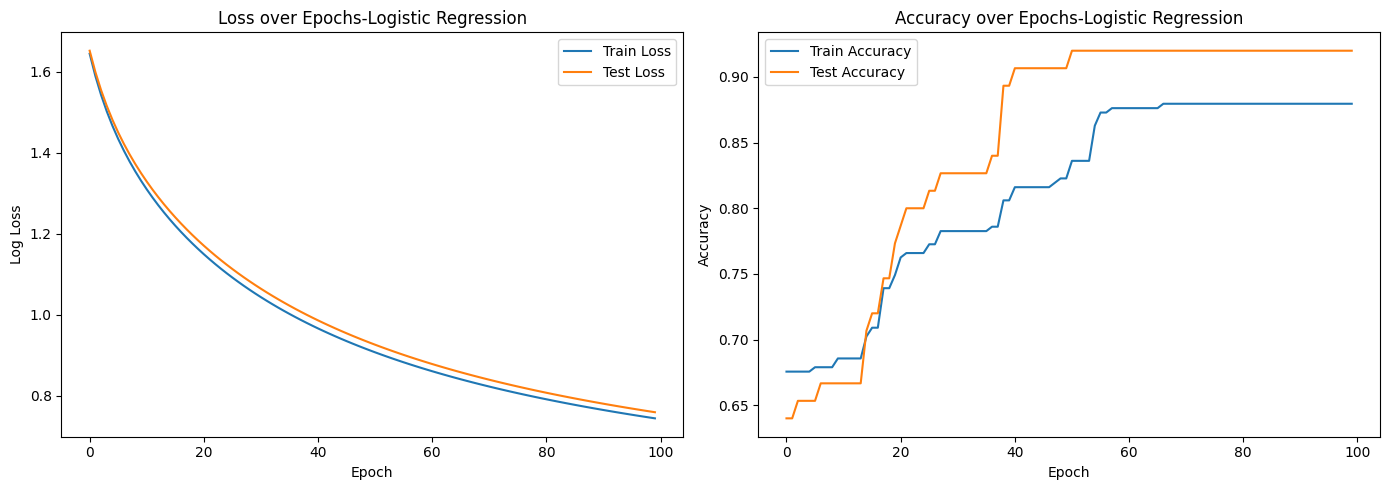

In [54]:
# Plot Learning Curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Loss over Epochs-Logistic Regression')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs-Logistic Regression')
plt.legend()

plt.tight_layout()
plt.show()

FINAL RESULTS AND PLOTS OF THE MODEL

 Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.86      0.92        14
           4       0.88      1.00      0.93        14
           5       0.93      0.93      0.93        14
           6       0.89      0.89      0.89         9
           7       1.00      0.80      0.89        10
           8       0.88      1.00      0.93        14

    accuracy                           0.92        75
   macro avg       0.93      0.91      0.92        75
weighted avg       0.93      0.92      0.92        75



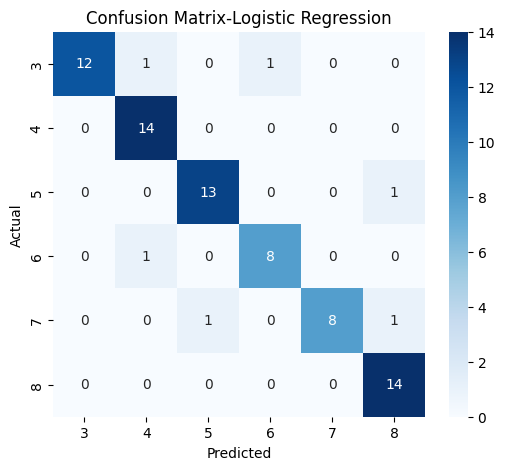

In [55]:
# FINAL PREDICTIONS
y_pred = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)

# CLASSIFICATION REPORT
print(" Classification Report:")
print(classification_report(y_test, y_pred))

# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix-Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [56]:


# Calculate macro and weighted scores
precision_macro_lr = precision_score(y_test, y_pred, average='macro')
recall_macro_lr = recall_score(y_test, y_pred, average='macro')
f1_macro_lr= f1_score(y_test, y_pred, average='macro')

precision_weighted_lr = precision_score(y_test, y_pred, average='weighted')
recall_weighted_lr = recall_score(y_test, y_pred, average='weighted')
f1_weighted_lr = f1_score(y_test, y_pred, average='weighted')


# Saving results for model comparison
macro_lr = {
    'precision_macro': precision_macro_lr,
    'recall_macro': recall_macro_lr,
    'f1_macro': f1_macro_lr
}

weighted_lr ={
    'precision_weighted': precision_weighted_lr,
    'recall_weighted': recall_weighted_lr,
    'f1_weighted': f1_weighted_lr
}

print("Model Metrics:Macro Average")
print(macro_lr)
print("Model Metrics:Weighted Average")
print(weighted_lr)

Model Metrics:Macro Average
{'precision_macro': 0.927910052910053, 'recall_macro': 0.9124338624338625, 'f1_macro': 0.916015466015466}
Model Metrics:Weighted Average
{'precision_weighted': 0.9266666666666666, 'recall_weighted': 0.92, 'f1_weighted': 0.9192706552706553}


In [57]:
# ROC CURVE

# Binarize output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=classes)
y_prob_bin = y_prob
n_classes = y_test_bin.shape[1]

# Overall AUC Score
overall_auc_lr = roc_auc_score(y_test_bin, y_prob_bin, multi_class='ovr')
print(f" Overall AUC Score: {overall_auc_lr:.2f}")

 Overall AUC Score: 0.97


MODEL 2-RANDOM FOREST

In [58]:
# Hypertuning parameters
param_grid = {
    'n_estimators': [ 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [21]:
# Set up the Random Forest model
rf = RandomForestClassifier(random_state=40)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_trainval_scaled, y_trainval)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-validation Score: 0.9631638418079096


In [22]:
# Set up the RandomForestClassifier with the best hyperparameters
best_rf = RandomForestClassifier(random_state=40, **grid_search.best_params_)

# Train the model on the scaled training data
best_rf.fit(X_trainval_scaled, y_trainval)

# Make predictions on the scaled test data
y_pred_rf = best_rf.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy on Test Set: {accuracy_rf:.4f}")

Random Forest Classifier Accuracy on Test Set: 0.9867


In [23]:

# Helper Function
def random_selection_np(X, y, fraction=0.5, seed=None):
    """
    Randomly selects a subset (fraction) of X and y using NumPy indexing.
    """
    rng = np.random.RandomState(seed)
    total = len(X)
    subset_size = int(total * fraction)
    indices = rng.choice(total, subset_size, replace=False)

    X_subset = X[indices]
    y_subset = y.iloc[indices] if hasattr(y, 'iloc') else y[indices]

    return X_subset, y_subset


# Parameters
n_estimators_values = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900,
                       1000, 1200, 1500, 2000, 2500, 3000, 3500, 4000]
repeats = 5


# Extract grid search params
best_params = {
    k: v for k, v in grid_search.best_params_.items() if k != 'n_estimators'
}
best_params['class_weight'] = 'balanced'
# Storage for results
test_accuracies = []
train_accuracies = []
test_log_losses = []
train_log_losses = []




# Main Loop
for n in n_estimators_values:
    acc_test_all = []
    acc_train_all = []
    loss_test_all = []
    loss_train_all = []

    for rep in range(repeats):
        # Use custom NumPy random selection
        X_subset, y_subset = random_selection_np(X_trainval_scaled, y_trainval, fraction=0.5, seed=rep)

        # Train model
        rf_model = RandomForestClassifier(n_estimators=n, random_state=rep, **best_params)
        rf_model.fit(X_subset, y_subset)

        # Predict
        y_pred_test = rf_model.predict(X_test_scaled)
        y_pred_train = rf_model.predict(X_subset)

        # Accuracy
        acc_test_all.append(accuracy_score(y_test, y_pred_test))
        acc_train_all.append(accuracy_score(y_subset, y_pred_train))

        # Log Loss
        y_prob_test = rf_model.predict_proba(X_test_scaled)
        y_prob_train = rf_model.predict_proba(X_subset)
        loss_test_all.append(log_loss(y_test, y_prob_test))
        loss_train_all.append(log_loss(y_subset, y_prob_train))

    # Average over repeats
    test_acc_avg = np.mean(acc_test_all)
    train_acc_avg = np.mean(acc_train_all)
    test_loss_avg = np.mean(loss_test_all)
    train_loss_avg = np.mean(loss_train_all)

    test_accuracies.append(test_acc_avg)
    train_accuracies.append(train_acc_avg)
    test_log_losses.append(test_loss_avg)
    train_log_losses.append(train_loss_avg)

    print(f"n_estimators={n} | Test Acc: {test_acc_avg:.4f} | Train Acc: {train_acc_avg:.4f} | "
          f"Test Log Loss: {test_loss_avg:.4f} | Train Log Loss: {train_loss_avg:.4f}")
# Save final stabilized test accuracy
best_test_acc_rf = test_accuracies[-1]
print(f"\nFinal stabilized test accuracy: {best_test_acc_rf:.4f}")


n_estimators=10 | Test Acc: 0.9547 | Train Acc: 0.9826 | Test Log Loss: 0.4116 | Train Log Loss: 0.0904
n_estimators=50 | Test Acc: 0.9680 | Train Acc: 0.9866 | Test Log Loss: 0.3919 | Train Log Loss: 0.0808
n_estimators=100 | Test Acc: 0.9600 | Train Acc: 0.9906 | Test Log Loss: 0.3086 | Train Log Loss: 0.0784
n_estimators=200 | Test Acc: 0.9600 | Train Acc: 0.9879 | Test Log Loss: 0.1535 | Train Log Loss: 0.0804
n_estimators=300 | Test Acc: 0.9600 | Train Acc: 0.9893 | Test Log Loss: 0.1522 | Train Log Loss: 0.0804
n_estimators=400 | Test Acc: 0.9600 | Train Acc: 0.9893 | Test Log Loss: 0.1528 | Train Log Loss: 0.0798
n_estimators=500 | Test Acc: 0.9600 | Train Acc: 0.9893 | Test Log Loss: 0.1545 | Train Log Loss: 0.0796
n_estimators=600 | Test Acc: 0.9653 | Train Acc: 0.9893 | Test Log Loss: 0.1532 | Train Log Loss: 0.0798
n_estimators=700 | Test Acc: 0.9653 | Train Acc: 0.9893 | Test Log Loss: 0.1528 | Train Log Loss: 0.0799
n_estimators=800 | Test Acc: 0.9627 | Train Acc: 0.9893 |

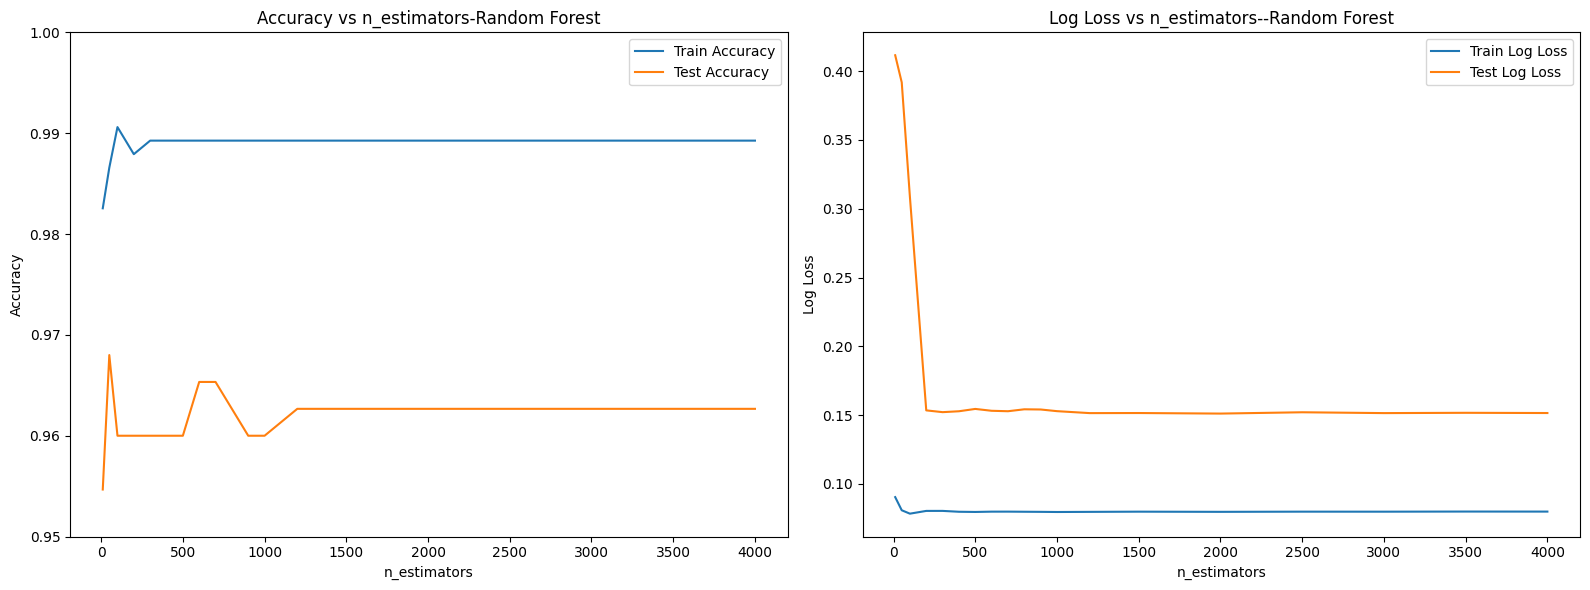

In [24]:

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#  Accuracy Plot
axes[0].plot(n_estimators_values[:len(train_accuracies)], train_accuracies, label="Train Accuracy")
axes[0].plot(n_estimators_values[:len(test_accuracies)], test_accuracies, label="Test Accuracy")
axes[0].set_xlabel("n_estimators")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Accuracy vs n_estimators-Random Forest")
axes[0].set_ylim(0.95, 1.0)
axes[0].legend()

#  Log Loss Plot
axes[1].plot(n_estimators_values[:len(train_log_losses)], train_log_losses, label="Train Log Loss")
axes[1].plot(n_estimators_values[:len(test_log_losses)], test_log_losses, label="Test Log Loss")
axes[1].set_xlabel("n_estimators")
axes[1].set_ylabel("Log Loss")
axes[1].set_title("Log Loss vs n_estimators--Random Forest")
axes[1].legend()


# Show the plots
plt.tight_layout()
plt.show()


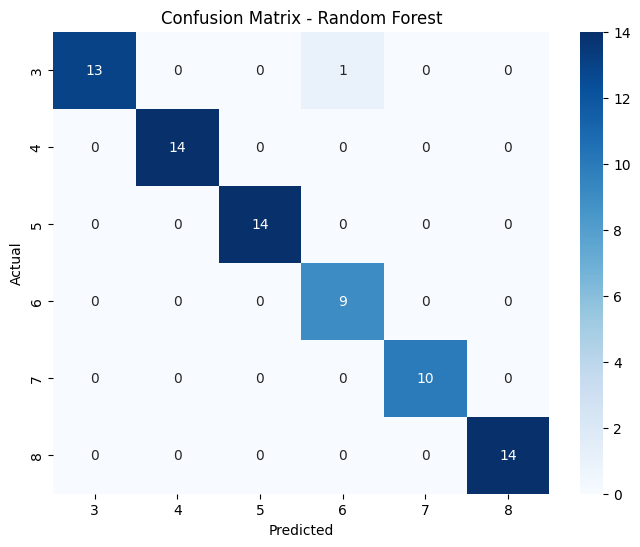

Classification Report - Random Forest:
              precision    recall  f1-score   support

           3       1.00      0.93      0.96        14
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        14
           6       0.90      1.00      0.95         9
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        14

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

Model Metrics: Macro Average
{'precision_macro': 0.9833333333333334, 'recall_macro': 0.9880952380952381, 'f1_macro': 0.9850552306692656}
Model Metrics: Weighted Average
{'precision_weighted': 0.9879999999999999, 'recall_weighted': 0.9866666666666667, 'f1_weighted': 0.9867706302794023}


In [25]:
# CONFUSION MATRIX
y_pred_rf = best_rf.predict(X_test_scaled)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# CLASSIFICATION REPORT
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Calculate macro and weighted scores
precision_macro_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_macro_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_macro_rf = f1_score(y_test, y_pred_rf, average='macro')

precision_weighted_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_weighted_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_weighted_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Saving results for model comparison
macro_rf = {
    'precision_macro': precision_macro_rf,
    'recall_macro': recall_macro_rf,
    'f1_macro': f1_macro_rf
}

weighted_rf = {
    'precision_weighted': precision_weighted_rf,
    'recall_weighted': recall_weighted_rf,
    'f1_weighted': f1_weighted_rf
}

print("Model Metrics: Macro Average")
print(macro_rf)
print("Model Metrics: Weighted Average")
print(weighted_rf)


In [26]:
# ROC Curve
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_prob_bin = rf_model.predict_proba(X_test_scaled)

n_classes = y_test_bin.shape[1]

# Overall AUC Score
overall_auc_rf = roc_auc_score(y_test_bin, y_prob_bin, multi_class='ovr')
print(f"Overall AUC Score: {overall_auc_rf:.2f}")

Overall AUC Score: 1.00


MODEL 3- SVM

 Hyperparameter Tuning - Grid Search

In [27]:
# Define hyperparameter grid for SGDClassifier with hinge loss
param_grid_sgd_hinge = {
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2']
}

# Setting up the SGDClassifier with hinge loss
sgd_hinge = SGDClassifier(
    loss='hinge',
    learning_rate='constant',
    random_state=42
)

# Setting up the GridSearchCV
grid_search_sgd_hinge = GridSearchCV(
    estimator=sgd_hinge,
    param_grid=param_grid_sgd_hinge,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search_sgd_hinge.fit(X_trainval_scaled, y_trainval)

# Output best params and CV score
print("Best Hyperparameters for SVM :", grid_search_sgd_hinge.best_params_)
print("Best Cross-validation Score:", grid_search_sgd_hinge.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters for SVM : {'alpha': 0.001, 'eta0': 0.1, 'penalty': 'l2'}
Best Cross-validation Score: 0.8929943502824859


In [28]:
# Get best model from Grid Search
best_svm_model = grid_search_sgd_hinge.best_estimator_

# Predict on test data
y_test_pred = best_svm_model.predict(X_test_scaled)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy for SVM :", test_accuracy)



Test Accuracy for SVM : 0.92


In [29]:
# Define multiclass hinge loss function
def multiclass_hinge_loss(y_true, decision_scores):
    n_samples = y_true.shape[0]
    correct_class_scores = decision_scores[np.arange(n_samples), y_true]
    margins = 1 + decision_scores - correct_class_scores[:, np.newaxis]
    margins[np.arange(n_samples), y_true] = 0
    losses = np.maximum(0, margins)
    return np.mean(np.max(losses, axis=1))


In [30]:

# Encode labels to zero-based integers
le = LabelEncoder()
y_trainval_enc = le.fit_transform(y_trainval)
y_test_enc = le.transform(y_test)

classes = np.unique(y_trainval_enc)

# Extract best hyperparameters from GridSearchCV
best_params = grid_search_sgd_hinge.best_params_
best_eta0 = best_params['eta0']
best_alpha = best_params['alpha']
best_penalty = best_params['penalty']

# Setting up the SGDClassifier with hinge loss and best params
svm_clf = SGDClassifier(
    loss='hinge',
    learning_rate='constant',
    eta0=0.001,
    alpha=best_alpha,
    penalty=best_penalty,
    max_iter=100,
    warm_start=True,
    random_state=42
)

epochs = 100
patience = 15
no_improve = 0
best_test_acc_svm = 0
best_loss = float("inf")  # Track best test loss

train_acc, test_acc = [], []
train_loss, test_loss = [], []

for epoch in range(epochs):
    if epoch == 0:
        svm_clf.partial_fit(X_trainval_scaled, y_trainval_enc, classes=classes)
    else:
        svm_clf.partial_fit(X_trainval_scaled, y_trainval_enc)

    # Predict labels
    y_train_pred = svm_clf.predict(X_trainval_scaled)
    y_test_pred = svm_clf.predict(X_test_scaled)

    # Get decision scores
    train_scores = svm_clf.decision_function(X_trainval_scaled)
    test_scores = svm_clf.decision_function(X_test_scaled)

    # Calculate accuracy
    acc_train = accuracy_score(y_trainval_enc, y_train_pred)
    acc_test = accuracy_score(y_test_enc, y_test_pred)

    # Calculate hinge loss
    loss_train = multiclass_hinge_loss(y_trainval_enc, train_scores)
    loss_test = multiclass_hinge_loss(y_test_enc, test_scores)

    train_acc.append(acc_train)
    test_acc.append(acc_test)
    train_loss.append(loss_train)
    test_loss.append(loss_test)

    print(f"Epoch {epoch+1:03d} | Train Acc: {acc_train:.4f} | Test Acc: {acc_test:.4f} | Train Loss: {loss_train:.4f} | Test Loss: {loss_test:.4f}")

    if loss_test < best_loss:
        best_loss = loss_test
        best_test_acc_svm = acc_test  # Save stabilized test accuracy here
        no_improve = 0
    else:
        no_improve += 1
        if no_improve >= patience:
            print("Early stopping triggered.")
            break

print(f"Final Stabilized Test Accuracy: {best_test_acc_svm:.4f}")


Epoch 001 | Train Acc: 0.6656 | Test Acc: 0.6267 | Train Loss: 0.8303 | Test Loss: 0.8421
Epoch 002 | Train Acc: 0.6689 | Test Acc: 0.6267 | Train Loss: 0.7556 | Test Loss: 0.7697
Epoch 003 | Train Acc: 0.6722 | Test Acc: 0.6400 | Train Loss: 0.7248 | Test Loss: 0.7342
Epoch 004 | Train Acc: 0.6722 | Test Acc: 0.6400 | Train Loss: 0.7071 | Test Loss: 0.7108
Epoch 005 | Train Acc: 0.6689 | Test Acc: 0.6400 | Train Loss: 0.6928 | Test Loss: 0.6919
Epoch 006 | Train Acc: 0.6622 | Test Acc: 0.6400 | Train Loss: 0.6872 | Test Loss: 0.6763
Epoch 007 | Train Acc: 0.6522 | Test Acc: 0.6400 | Train Loss: 0.6874 | Test Loss: 0.6671
Epoch 008 | Train Acc: 0.6656 | Test Acc: 0.6400 | Train Loss: 0.6782 | Test Loss: 0.6509
Epoch 009 | Train Acc: 0.7191 | Test Acc: 0.7333 | Train Loss: 0.6689 | Test Loss: 0.6364
Epoch 010 | Train Acc: 0.7224 | Test Acc: 0.7333 | Train Loss: 0.6581 | Test Loss: 0.6207
Epoch 011 | Train Acc: 0.7224 | Test Acc: 0.7467 | Train Loss: 0.6429 | Test Loss: 0.6015
Epoch 012 

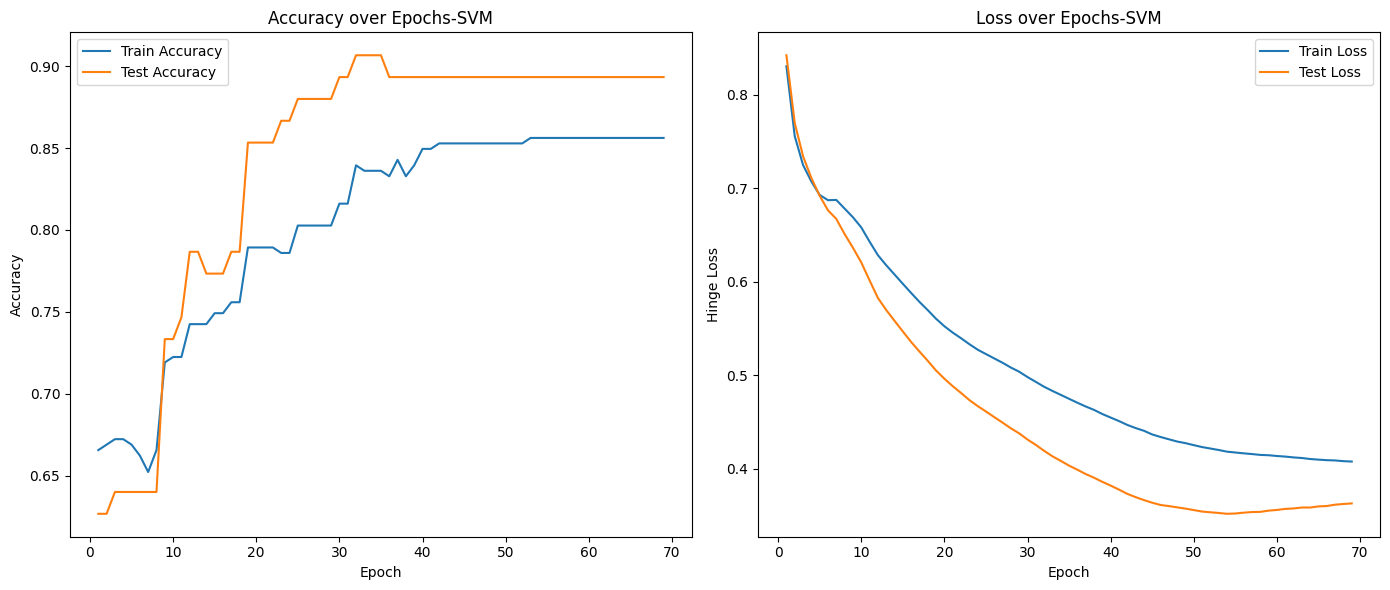

In [31]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Accuracy')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs-SVM')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Hinge Loss')
plt.title('Loss over Epochs-SVM')
plt.legend()

plt.tight_layout()
plt.show()

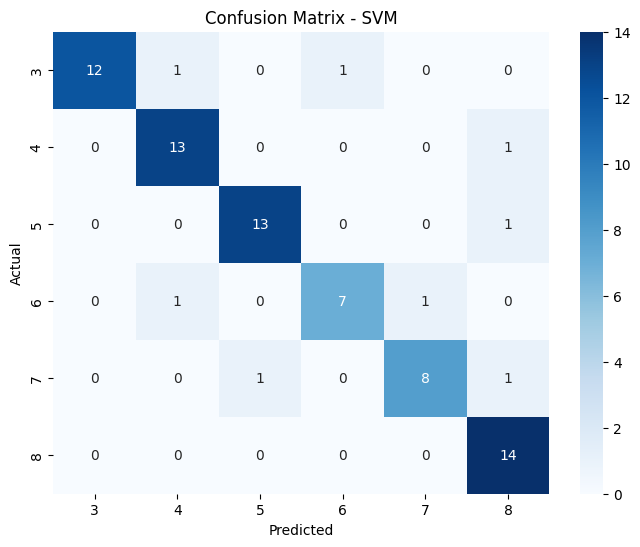

Classification Report - SVM:
              precision    recall  f1-score   support

           3       1.00      0.86      0.92        14
           4       0.87      0.93      0.90        14
           5       0.93      0.93      0.93        14
           6       0.88      0.78      0.82         9
           7       0.89      0.80      0.84        10
           8       0.82      1.00      0.90        14

    accuracy                           0.89        75
   macro avg       0.90      0.88      0.89        75
weighted avg       0.90      0.89      0.89        75

Model Metrics: Macro Average
{'precision_macro': 0.8971093993152816, 'recall_macro': 0.882010582010582, 'f1_macro': 0.8861767595267493}
Model Metrics: Weighted Average
{'precision_weighted': 0.8990217864923747, 'recall_weighted': 0.8933333333333333, 'f1_weighted': 0.8927037291838912}


In [32]:
# Get final predictions on test set (encoded)
final_y_pred = svm_clf.predict(X_test_scaled)

# Reverse label encoding to get original class labels (for confusion matrix & print)
final_y_pred_labels = le.inverse_transform(final_y_pred)
y_test_labels = le.inverse_transform(y_test_enc)

# Confusion Matrix plot with original labels
cm = confusion_matrix(y_test_labels, final_y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# Classification Report with original labels
print("Classification Report - SVM:")
print(classification_report(y_test_labels, final_y_pred_labels))

# Calulate macro and weighted scores
from sklearn.metrics import precision_score, recall_score, f1_score

precision_macro = precision_score(y_test_enc, final_y_pred, average='macro')
recall_macro = recall_score(y_test_enc, final_y_pred, average='macro')
f1_macro = f1_score(y_test_enc, final_y_pred, average='macro')

precision_weighted = precision_score(y_test_enc, final_y_pred, average='weighted')
recall_weighted = recall_score(y_test_enc, final_y_pred, average='weighted')
f1_weighted = f1_score(y_test_enc, final_y_pred, average='weighted')

# Saving results for model comparison
macro_svm = {
    'precision_macro': precision_macro,
    'recall_macro': recall_macro,
    'f1_macro': f1_macro
}

weighted_svm = {
    'precision_weighted': precision_weighted,
    'recall_weighted': recall_weighted,
    'f1_weighted': f1_weighted
}

print("Model Metrics: Macro Average")
print(macro_svm)
print("Model Metrics: Weighted Average")
print(weighted_svm)


In [33]:
# Get unique classes
classes = np.unique(y_trainval_enc)

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test_enc, classes=classes)
y_prob_bin = svm_clf.decision_function(X_test_scaled)
n_classes = y_test_bin.shape[1]


# Overall AUC Score
overall_auc_svm = roc_auc_score(y_test_bin, y_prob_bin, multi_class='ovr')
print(f"Overall AUC Score: {overall_auc_svm:.2f}")


Overall AUC Score: 0.96


COMPARISON PLOTS OF ALL MODELS

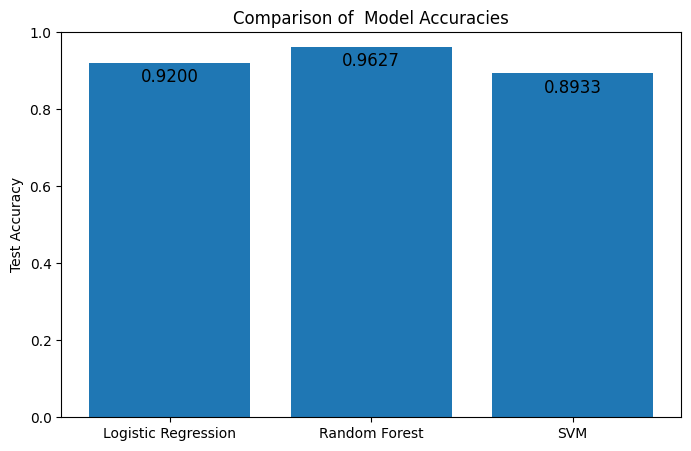

In [34]:
#COMPARISON OF ACCURACIES

# Models and their stabilized test accuracies
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [best_test_acc_lr, best_test_acc_rf, best_test_acc_svm]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies)
plt.ylim(0, 1)
plt.ylabel('Test Accuracy')
plt.title('Comparison of  Model Accuracies')

# Add accuracy labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.05, f"{height:.4f}", ha='center', color='black', fontsize=12)

plt.show()


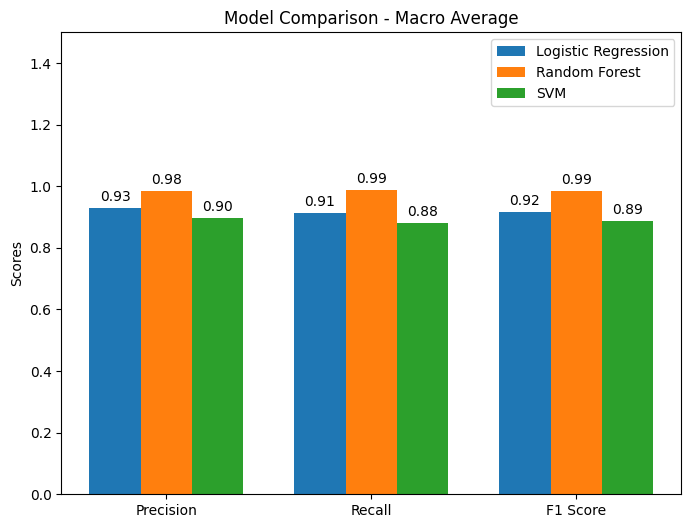

In [35]:
# COMPARISON OF MACRO AVERAGED PRECISION,RECALL AND F1 SCORE

# Model names
models = ['Logistic Regression', 'Random Forest', 'SVM']

# Metrics for macro average
metrics_macro = ['precision_macro', 'recall_macro', 'f1_macro']

# Scores for macro average
macro_scores = [
    [macro_lr[m] for m in metrics_macro],
    [macro_rf[m] for m in metrics_macro],
    [macro_svm[m] for m in metrics_macro]
]
 # Precision, Recall, F1 positions
x = np.arange(len(metrics_macro))
width = 0.25  # width of each bar

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width, macro_scores[0], width, label='Logistic Regression')
rects2 = ax.bar(x, macro_scores[1], width, label='Random Forest')
rects3 = ax.bar(x + width, macro_scores[2], width, label='SVM')

# Labels and title
ax.set_ylabel('Scores')
ax.set_title('Model Comparison - Macro Average')
ax.set_xticks(x)
ax.set_xticklabels(['Precision', 'Recall', 'F1 Score'])
ax.legend()
ax.set_ylim(0, 1.5)

# Add score labels above bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.show()


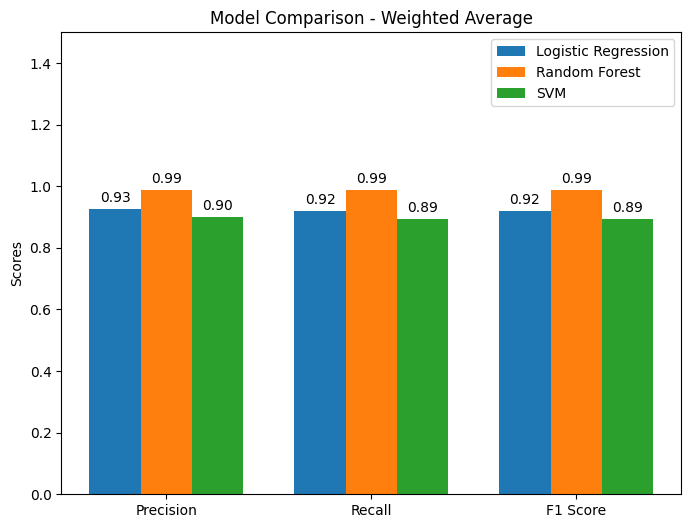

In [36]:
# COMPARISON OF WEIGHTED AVERAGED PRECISION,RECALL AND F1 SCORE

# Model names
models = ['Logistic Regression', 'Random Forest', 'SVM']

# Metrics for weighted average
metrics_weighted = ['precision_weighted', 'recall_weighted', 'f1_weighted']

# Scores for weighted average
weighted_scores = [
    [weighted_lr[m] for m in metrics_weighted],
    [weighted_rf[m] for m in metrics_weighted],
    [weighted_svm[m] for m in metrics_weighted]
]
# Precision, Recall, F1 positions
x = np.arange(len(metrics_weighted))
# width of each bar
width = 0.25

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width, weighted_scores[0], width, label='Logistic Regression')
rects2 = ax.bar(x, weighted_scores[1], width, label='Random Forest')
rects3 = ax.bar(x + width, weighted_scores[2], width, label='SVM')

# Labels and title
ax.set_ylabel('Scores')
ax.set_title('Model Comparison - Weighted Average')
ax.set_xticks(x)
ax.set_xticklabels(['Precision', 'Recall', 'F1 Score'])
ax.legend()
ax.set_ylim(0, 1.5)

# Add score labels above bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.show()


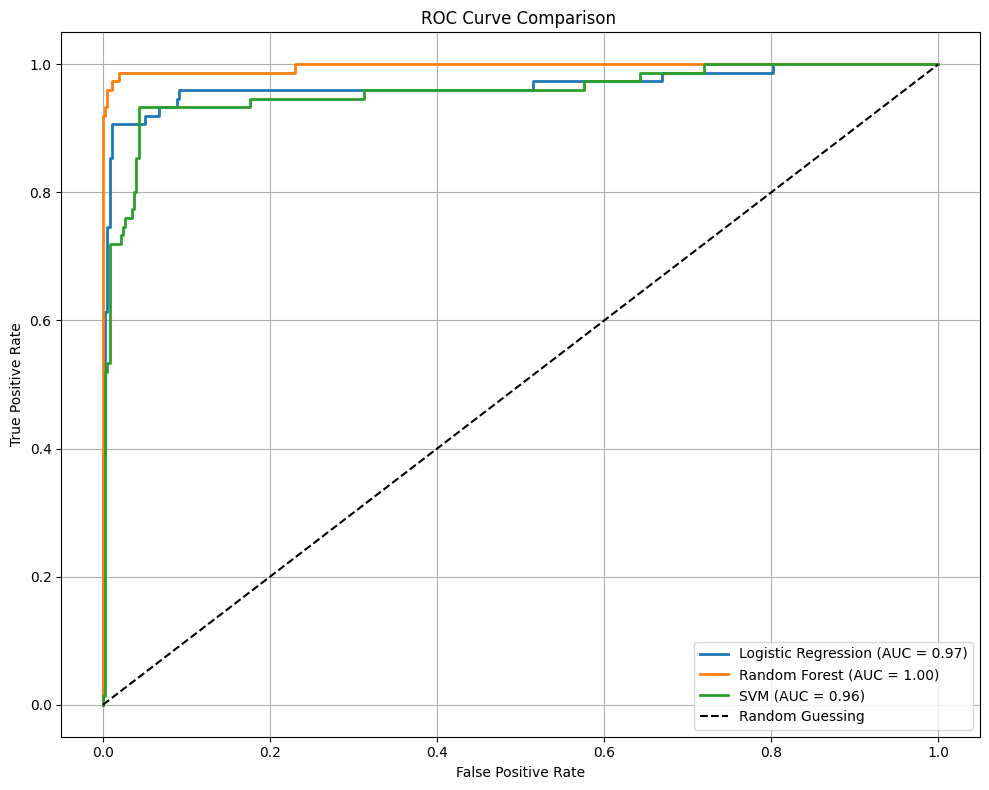

In [37]:
# COMPARISON ROC

# Binarize the test labels
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Get predictions for each model
y_prob_logreg = y_prob                     # Logistic Regression predicted probabilities
y_prob_rf = rf_model.predict_proba(X_test_scaled)  # Random Forest probabilities
y_prob_svm = svm_clf.decision_function(X_test_scaled)  # SVM decision scores

# Compute micro-average ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test_bin.ravel(), y_prob_logreg.ravel())
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test_bin.ravel(), y_prob_rf.ravel())
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_svm, tpr_svm, _ = roc_curve(y_test_bin.ravel(), y_prob_svm.ravel())
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot all ROC curves for 3 models
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', linewidth=2)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', linewidth=2)

# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Plot settings
plt.title('ROC Curve Comparison ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

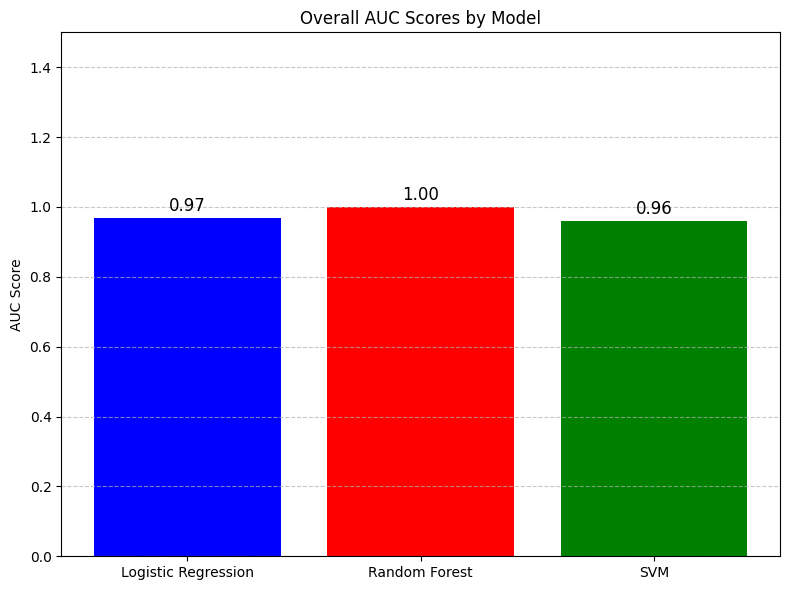

In [38]:

# COMPARISON OF AUC
# Model names and AUC scores
models = ['Logistic Regression', 'Random Forest', 'SVM']
auc_scores = [overall_auc_lr, overall_auc_rf, overall_auc_svm]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, auc_scores, color=['blue', 'red', 'green'])

# bars with AUC values
for bar, score in zip(bars, auc_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{score:.2f}',
             ha='center', va='bottom', fontsize=12)

# Plot settings
plt.title('Overall AUC Scores by Model')
plt.ylabel('AUC Score')
plt.ylim(0, 1.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()